In [90]:
!pip3 install tensorflow



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip


In [91]:
!pip3 install pandas



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip


In [92]:
!pip3 install matplotlib



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
from tensorflow.keras.datasets import mnist

In [95]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [96]:
X_train.shape

(60000, 28, 28)

In [97]:
single_image = X_train[25]

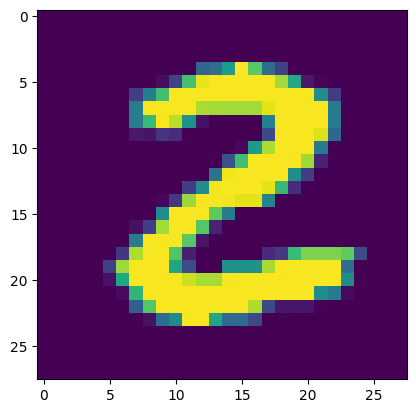

In [98]:
plt.imshow(single_image)

In [99]:
from tensorflow.keras.utils import to_categorical

In [100]:
y_cat_test = to_categorical(y_test,10)

In [101]:
y_cat_train = to_categorical(y_train,10)

In [102]:
y_cat_test.shape

(10000, 10)

In [103]:
y_cat_train.shape

(60000, 10)

In [104]:
X_train =X_train/255
X_test = X_test/255

In [105]:
X_train = X_train.reshape(60000,28,28,1)

In [106]:
X_test = X_test.reshape(10000,28,28,1)

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten

In [133]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/


In [134]:
from tensorflow.keras.callbacks import EarlyStopping

In [136]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

In [137]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1435 - accuracy: 0.9571 - val_loss: 0.0515 - val_accuracy: 0.9831
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0476 - accuracy: 0.9851 - val_loss: 0.0500 - val_accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0390 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0211 - accuracy: 0.9930 - val_loss: 0.0406 - val_accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0157 - accuracy: 0.9947 - val_loss: 0.0405 - val_accuracy: 0.9876


In [138]:
metrics = pd.DataFrame(model.history.history)

In [139]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.143533,0.957083,0.051520,0.9831
1,0.047641,0.985100,0.049982,0.9835
2,0.031015,0.990033,0.039035,0.9883
3,0.021130,0.992967,0.040647,0.9868
4,0.015686,0.994683,0.040547,0.9876


In [140]:
!pip3 install scikit-learn



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip


In [141]:
from sklearn.metrics import classification_report, confusion_matrix

In [142]:
predictions = model.predict(X_test)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Generate classification report
print(classification_report(np.argmax(y_cat_test, axis=1), predicted_classes))

313/313 [==============================] - 0s 994us/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [271]:
from IPython.display import Markdown

# Set the project name
project_name = "MNIST Project"

# Introduction text
introduction_text = f'''
# {project_name}

The MNIST project is a classic and widely recognized task in the field of machine learning and computer vision. It focuses on the classification of handwritten digits using the MNIST dataset, which consists of a large collection of labeled images of handwritten digits from 0 to 9.

The goal of the project is to develop a machine learning model capable of accurately recognizing and classifying these handwritten digits. By training a neural network on the MNIST dataset, I aim to build a model that can generalize well and correctly classify new, unseen handwritten digits.

'''

# Create a markdown cell and display the introduction text
display(Markdown(introduction_text))





# MNIST Project

The MNIST project is a classic and widely recognized task in the field of machine learning and computer vision. It focuses on the classification of handwritten digits using the MNIST dataset, which consists of a large collection of labeled images of handwritten digits from 0 to 9.

The goal of the project is to develop a machine learning model capable of accurately recognizing and classifying these handwritten digits. By training a neural network on the MNIST dataset, I aim to build a model that can generalize well and correctly classify new, unseen handwritten digits.



In [303]:
my_number = X_test[254]
my_number = my_number.reshape(1,28,28,1)

In [304]:
# Model Prediction
predictions1 = model.predict(my_number)
np.argmax(predictions1, axis=1)

1/1 [==============================] - 0s 12ms/step


array([7])

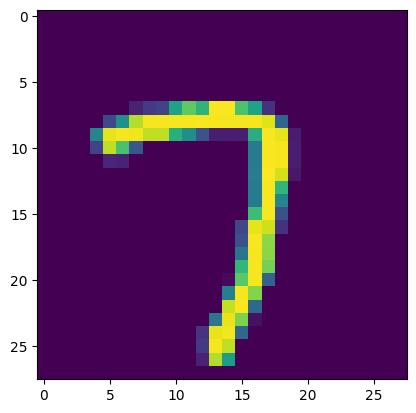

In [305]:
#Image Result 
plt.imshow(my_number.reshape(28,28,1))